In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import statsmodels.api as sm

Data = "advecon.csv"
Data1 = "usa.csv"
Data2 = "canada.csv"
dataW = pd.read_csv(Data)
dataW1 = pd.read_csv(Data1)
dataW2 = pd.read_csv(Data2)

#starting with US economy

dataT = dataW1

dataT.head()


,year,gdprate,infrate,unemprate,gdppcrate
0,1980,-0.257,13.502,7.175,-1.405
1,1981,2.538,10.378,7.617,1.515
2,1982,-1.802,6.158,9.708,-2.738
3,1983,4.584,3.160,9.600,3.638
4,1984,7.237,4.368,7.508,6.302


In [2]:
#calculating the Macroeconomic Result Index (MRI)

dataT['mri'] = (dataT["gdprate"] / (dataT["infrate"] + dataT["unemprate"])) * 1000
#print(dataT)

dataT.head()


,year,gdprate,infrate,unemprate,gdppcrate,mri
0,1980,-0.257,13.502,7.175,-1.405,-12.429269
1,1981,2.538,10.378,7.617,1.515,141.039178
2,1982,-1.802,6.158,9.708,-2.738,-113.576201
3,1983,4.584,3.160,9.600,3.638,359.247649
4,1984,7.237,4.368,7.508,6.302,609.380263


In [3]:
#Preparing linear regression

x = dataT['mri']
y = dataT['gdppcrate']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
mselinear = mean_squared_error(y, predictions)
R2linear = r2_score(y, predictions)
model.params


const   -0.898075
mri      0.008152
dtype: float64

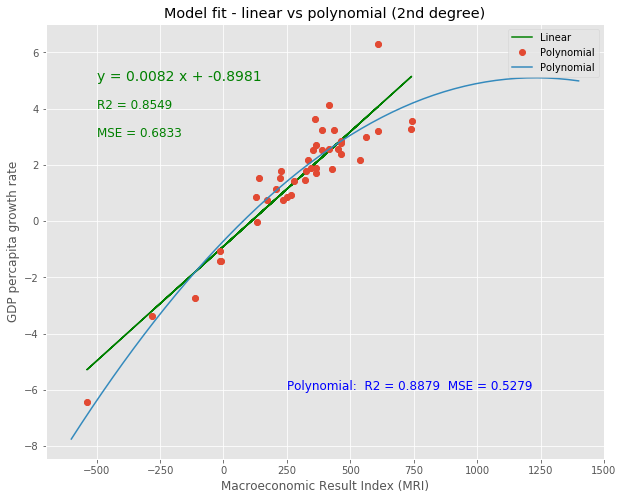

In [4]:
# Model fit for USA
#Linear regression versus polynomial(2nd degree) regression

plt.style.use('ggplot')
plt.figure(figsize = (10,8))

#linear regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(dataT["mri"], dataT["gdppcrate"])
regressValues = dataT["mri"]* slope + intercept
lineEq = f"y = {round(slope, 4)} x + {round(intercept, 4)}"

plt.scatter(dataT["mri"], dataT["gdppcrate"])
plt.plot(dataT["mri"], regressValues, color = "green", label = 'Linear')

plt.xlabel("Macroeconomic Result Index (MRI)")
plt.ylabel("GDP percapita growth rate")
plt.title("Model fit - linear vs polynomial (2nd degree)")

# polynomial (2nd degree) regression

deg = 2
x = dataT["mri"]
y = dataT["gdppcrate"]
p = np.poly1d(np.polyfit(x, y, deg))

R2poly = r2_score(y, p(x))

#linspace: min and max in scale of x-axis
t = np.linspace(-600, 1400)
plt.plot(x, y, 'o', t, p(t), '-', label = 'Polynomial')
msepoly = mean_squared_error(y, p(x))
Scorelinear = f"R2 = {round(R2linear, 4)}"
Scorelinear2 = f"MSE = {round(mselinear, 4)}"
plt.annotate(Scorelinear,(-500,4), color = "green", fontsize=12)
plt.annotate(Scorelinear2,(-500,3), color = "green", fontsize=12)
plt.annotate(lineEq,(-500,5), color = "green", fontsize=14)
Scorepoly = f"Polynomial:  R2 = {round(R2poly, 4)}  MSE = {round(msepoly, 4)}"
plt.annotate(Scorepoly,(250,-6), color = "blue", fontsize=12)

plt.legend()
plt.show()
